# 1번 데이터 EDA

### 1.1 데이터 불러오기

In [10]:
import pandas as pd
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('../data/big_data_set1_f.csv',encoding='cp949')

### 1.2 데이터 살펴보기

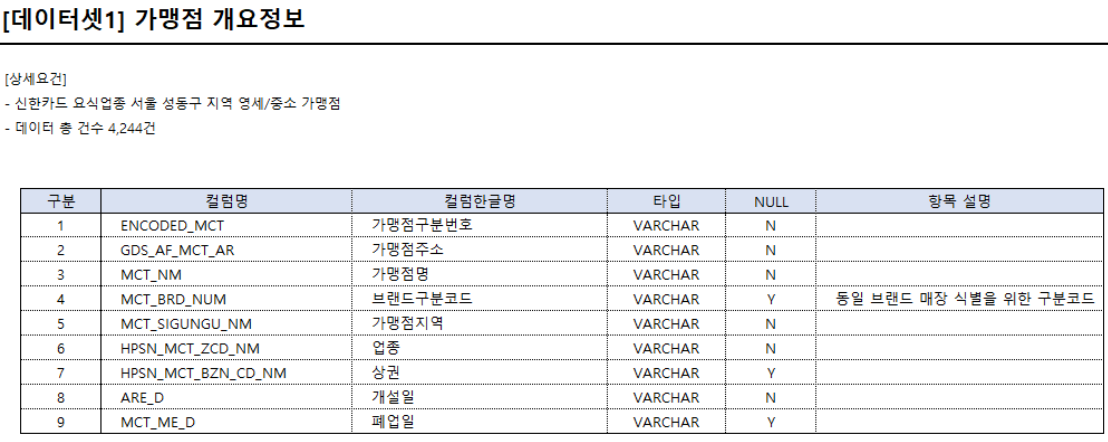

In [12]:
df.head()

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4185 non-null   object 
 1   MCT_BSE_AR          4185 non-null   object 
 2   MCT_NM              4185 non-null   object 
 3   MCT_BRD_NUM         542 non-null    object 
 4   MCT_SIGUNGU_NM      4185 non-null   object 
 5   HPSN_MCT_ZCD_NM     4185 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3138 non-null   object 
 7   ARE_D               4185 non-null   int64  
 8   MCT_ME_D            127 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.4+ KB


In [14]:
    # 데이터 상위 5개 행 출력
    print("--- 데이터 상위 5개 행 ---")
    print(df.head())

    # 데이터프레임 정보 출력 (열 이름, non-null 개수, 데이터 타입)
    print("\n--- 데이터프레임 정보 ---")
    print(df.info())

    # 각 열의 결측치 개수 확인
    print("\n--- 각 열의 결측치 개수 ---")
    print(df.isnull().sum())

--- 데이터 상위 5개 행 ---
  ENCODED_MCT  MCT_BSE_AR MCT_NM MCT_BRD_NUM MCT_SIGUNGU_NM HPSN_MCT_ZCD_NM  \
0  16184E93D9  서울 성동구 마장동   성우**         NaN         서울 성동구             축산물   
1  4D039EA8B7  서울 성동구 마장동   대보**         NaN         서울 성동구             축산물   
2  0074C4990A  서울 성동구 마장동   대용**         NaN         서울 성동구             축산물   
3  68308F2746  서울 성동구 마장동   통일**         NaN         서울 성동구             축산물   
4  4117EDDE9C  서울 성동구 마장동   한울**         NaN         서울 성동구             축산물   

  HPSN_MCT_BZN_CD_NM     ARE_D  MCT_ME_D  
0                마장동  20130320       NaN  
1                마장동  20131122       NaN  
2                마장동  20140512       NaN  
3                마장동  20151124       NaN  
4                마장동  20151211       NaN  

--- 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT        

## 2. 전처리 및 파생변수 추가

### 2.1 열 이름 변경

In [16]:
df.rename(columns={
    'MCT_BSE_AR': '가맹점주소',
    'MCT_NM': '가맹점명',
    'MCT_BRD_NUM': '브랜드구분코드',
    'MCT_SIGUNGU_NM': '가맹점지역',
    'HPSN_MCT_ZCD_NM': '업종',
    'HPSN_MCT_BZN_CD_NM': '상권',
    'ARE_D': '개설일',
    'MCT_ME_D': '폐업일'
}, inplace=True)

# 변경된 열 이름으로 데이터 상위 5개 행 출력
print("--- 열 이름 변경 후 데이터 상위 5개 행 ---")
print(df.head())

--- 열 이름 변경 후 데이터 상위 5개 행 ---
  ENCODED_MCT       가맹점주소  가맹점명 브랜드구분코드   가맹점지역   업종   상권       개설일  폐업일
0  16184E93D9  서울 성동구 마장동  성우**     NaN  서울 성동구  축산물  마장동  20130320  NaN
1  4D039EA8B7  서울 성동구 마장동  대보**     NaN  서울 성동구  축산물  마장동  20131122  NaN
2  0074C4990A  서울 성동구 마장동  대용**     NaN  서울 성동구  축산물  마장동  20140512  NaN
3  68308F2746  서울 성동구 마장동  통일**     NaN  서울 성동구  축산물  마장동  20151124  NaN
4  4117EDDE9C  서울 성동구 마장동  한울**     NaN  서울 성동구  축산물  마장동  20151211  NaN


### 2.2 '폐업여부' 컬럼 추가: 영업중이면 0, 폐업이면 1

In [17]:
df['폐업여부'] = (~df['폐업일'].isnull()).astype(int)

### 2.3 '폐업일' 컬럼의 결측치를 현재 날짜로 채우기

In [18]:
today = pd.Timestamp("2025-09-18")
df['폐업일'] = df['폐업일'].fillna(today)

+ 날짜 컬럼을 datetime 형식으로 변환

In [19]:
df['개설일'] = pd.to_datetime(df['개설일'], format='%Y%m%d', errors='coerce')
df['폐업일'] = pd.to_datetime(df['폐업일'], errors='coerce')

### 2.4 영업기간 컬럼 추가

In [30]:
df['영업기간_일'] = (df['폐업일'] - df['개설일']).dt.days
df['영업기간_년'] = (df['영업기간_일'] / 365).round(2)

In [31]:
df.head()

,ENCODED_MCT,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,폐업여부,영업기간_일,영업기간_년
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,2013-03-20,2025-09-18,0,4565,12.51
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,2013-11-22,2025-09-18,0,4318,11.83
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,2014-05-12,2025-09-18,0,4147,11.36
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,2015-11-24,2025-09-18,0,3586,9.82
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,2015-12-11,2025-09-18,0,3569,9.78


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ENCODED_MCT  4185 non-null   object        
 1   가맹점주소        4185 non-null   object        
 2   가맹점명         4185 non-null   object        
 3   브랜드구분코드      542 non-null    object        
 4   가맹점지역        4185 non-null   object        
 5   업종           4185 non-null   object        
 6   상권           3138 non-null   object        
 7   개설일          4185 non-null   datetime64[ns]
 8   폐업일          4185 non-null   datetime64[ns]
 9   폐업여부         4185 non-null   int32         
 10  영업기간_일       4185 non-null   int64         
 11  영업기간_년       4185 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(7)
memory usage: 376.1+ KB


### 2.5 브랜드구분코드 결측치 처리

In [33]:
df['브랜드구분코드'].unique()

array([nan, '치킨19', '피자2', '축산물2', '베이커리10', '한식-냉면1', '피자8', '식료품3',
       '아이스크림/빙수2', '치킨6', '샌드위치/토스트2', '햄버거2', '도시락3', '피자7',
       '한식-육류/고기25', '치킨14', '중식당3', '치킨18', '햄버거1', '베이커리2', '치킨21',
       '분식19', '한식-육류/고기8', '치킨27', '커피전문점6', '분식4', '주류1', '호프/맥주3',
       '커피전문점4', '호프/맥주7', '주스1', '백반/가정식23', '도시락2', '한식-죽2', '중식당1',
       '한식-육류/고기21', '한식-찌개/전골1', '분식12', '분식10', '샌드위치/토스트3', '커피전문점9',
       '청과물1', '베이커리6', '치킨25', '치킨3', '한식-국밥/설렁탕14', '치킨15', '치킨8',
       '커피전문점11', '커피전문점10', '분식13', '한식-해물/생선5', '피자10', '백반/가정식22',
       '피자5', '한식-단품요리일반6', '치킨36', '아이스크림/빙수6', '한식-육류/고기31', '햄버거3',
       '한식-육류/고기24', '한식-국밥/설렁탕8', '한식-육류/고기20', '한식-해물/생선2', '치킨37',
       '치킨2', '한식-국수/만두7', '한식-육류/고기22', '기타세계요리1', '커피전문점1', '치킨33',
       '백반/가정식18', '한식-육류/고기5', '한식-감자탕1', '피자1', '카페11', '분식1', '카페8',
       '백반/가정식1', '한식-육류/고기30', '동남아/인도음식6', '치킨16', '한식-국수/만두3', '피자3',
       '한식-육류/고기19', '치킨20', '치킨32', '커피전문점2', '건강식품1', '호프/맥주2',
       '한식-해물/생선4', '식

In [34]:
df['브랜드구분코드'].nunique()

287

In [35]:
nobrand_df=df[df['브랜드구분코드'].isna()]
nobrand_df.head()

,ENCODED_MCT,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,폐업여부,영업기간_일,영업기간_년
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,2013-03-20,2025-09-18,0,4565,12.51
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,2013-11-22,2025-09-18,0,4318,11.83
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,2014-05-12,2025-09-18,0,4147,11.36
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,2015-11-24,2025-09-18,0,3586,9.82
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,2015-12-11,2025-09-18,0,3569,9.78


In [44]:
nobrand_df[['업종']].value_counts()

업종       
한식-육류/고기     401
카페           335
백반/가정식       323
한식-단품요리일반    291
축산물          281
            ... 
기사식당           1
한식-두부요리        1
도시락            1
탕후루            1
와플/크로플         1
Name: count, Length: 70, dtype: int64

### 2.6 상권 결측치 처리

In [47]:
df[df['상권'].isna()].head()

,ENCODED_MCT,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,폐업여부,영업기간_일,영업기간_년
6,9A71D71270,서울 성동구 마장동,미림**,NaN,서울 성동구,식품 제조,NaN,2017-08-17,2025-09-18,0,2954,8.09
9,27C88660A5,서울 성동구 송정동,북*,NaN,서울 성동구,중식당,NaN,2014-12-17,2025-09-18,0,3928,10.76
15,E863289A7D,서울 성동구 홍익동,조은**,NaN,서울 성동구,한식-단품요리일반,NaN,2015-01-16,2025-09-18,0,3898,10.68
18,3E35A71757,서울 성동구 마장동,멕시*****,치킨19,서울 성동구,치킨,NaN,2005-08-30,2025-09-18,0,7324,20.07
19,5017C6924A,서울 성동구 마장동,도미********,피자2,서울 성동구,피자,NaN,2010-07-23,2025-09-18,0,5536,15.17


## 3. 컬럼별로 살펴보기

In [50]:
df.columns

Index(['ENCODED_MCT', '가맹점주소', '가맹점명', '브랜드구분코드', '가맹점지역', '업종', '상권', '개설일',
       '폐업일', '폐업여부', '영업기간_일', '영업기간_년'],
      dtype='object')

### 3.1 ENCODED_MCT

In [51]:
df['ENCODED_MCT'].nunique()

4185

=> 겹치는 코드 없음.

### 3.2 가맹점주소

볼 거 없을 듯

### 3.3 가맹점명

In [59]:
df['가맹점명'].isna().sum()

0

In [57]:
df['가맹점명'].nunique()

3386

In [60]:
df['가맹점명'].value_counts()

가맹점명
성수**            31
카페***           16
성수****          12
카페**            11
한우**            10
                ..
묵은********       1
남도*              1
야마*****          1
재수**********     1
아이******         1
Name: count, Length: 3386, dtype: int64

In [63]:
df[df['가맹점명']=='성수**']['업종']

253            분식
510         호프/맥주
721        백반/가정식
911       일식-초밥/롤
1085       백반/가정식
1496     한식-육류/고기
1547       백반/가정식
1740       백반/가정식
1763     한식-육류/고기
1913           분식
1961     한식-육류/고기
2035     한식-국수/만두
2121     한식-해물/생선
2318     한식-육류/고기
2478       백반/가정식
2488         포장마차
2501         요리주점
2536     한식-육류/고기
2551          와인바
2962          일식당
3030         요리주점
3050     한식-찌개/전골
3299         이자카야
3345         베이커리
3354       백반/가정식
3368          와인바
3385           양식
3416     한식-해물/생선
3988       백반/가정식
4121    한식-단품요리일반
4159       백반/가정식
Name: 업종, dtype: object

In [61]:
#가맹점명에 따라서 검색했을 때 노출될 확률 같은 것도 다르니까 그런 것도 고려할 수도?

### 3.4 브랜드구분코드

In [64]:
df['브랜드구분코드'].unique()

array([nan, '치킨19', '피자2', '축산물2', '베이커리10', '한식-냉면1', '피자8', '식료품3',
       '아이스크림/빙수2', '치킨6', '샌드위치/토스트2', '햄버거2', '도시락3', '피자7',
       '한식-육류/고기25', '치킨14', '중식당3', '치킨18', '햄버거1', '베이커리2', '치킨21',
       '분식19', '한식-육류/고기8', '치킨27', '커피전문점6', '분식4', '주류1', '호프/맥주3',
       '커피전문점4', '호프/맥주7', '주스1', '백반/가정식23', '도시락2', '한식-죽2', '중식당1',
       '한식-육류/고기21', '한식-찌개/전골1', '분식12', '분식10', '샌드위치/토스트3', '커피전문점9',
       '청과물1', '베이커리6', '치킨25', '치킨3', '한식-국밥/설렁탕14', '치킨15', '치킨8',
       '커피전문점11', '커피전문점10', '분식13', '한식-해물/생선5', '피자10', '백반/가정식22',
       '피자5', '한식-단품요리일반6', '치킨36', '아이스크림/빙수6', '한식-육류/고기31', '햄버거3',
       '한식-육류/고기24', '한식-국밥/설렁탕8', '한식-육류/고기20', '한식-해물/생선2', '치킨37',
       '치킨2', '한식-국수/만두7', '한식-육류/고기22', '기타세계요리1', '커피전문점1', '치킨33',
       '백반/가정식18', '한식-육류/고기5', '한식-감자탕1', '피자1', '카페11', '분식1', '카페8',
       '백반/가정식1', '한식-육류/고기30', '동남아/인도음식6', '치킨16', '한식-국수/만두3', '피자3',
       '한식-육류/고기19', '치킨20', '치킨32', '커피전문점2', '건강식품1', '호프/맥주2',
       '한식-해물/생선4', '식

### 3.5 업종

In [65]:
df['업종'].unique()

array(['축산물', '식품 제조', '한식-육류/고기', '한식-찌개/전골', '중식당', '식료품', '한식-국수/만두',
       '인삼제품', '한식-단품요리일반', '한식-해물/생선', '치킨', '피자', '베이커리', '요리주점',
       '한식-냉면', '백반/가정식', '한식-국밥/설렁탕', '반찬', '떡/한과 제조', '건강식품', '커피전문점',
       '아이스크림/빙수', '룸살롱/단란주점', '일식-덮밥/돈가스', '카페', '분식', '샌드위치/토스트', '일식당',
       '한식-감자탕', '햄버거', '도시락', '꼬치구이', '양식', '포장마차', '미곡상', '주류', '호프/맥주',
       '주스', '한식-죽', '일식-우동/소바/라면', '농산물', '청과물', '담배', '건어물', '수산물',
       '건강원', '기타세계요리', '일반 유흥주점', '동남아/인도음식', '한식-두부요리', '이자카야', '테마카페',
       '유제품', '일식-초밥/롤', '와인바', '와인샵', '한식뷔페', '탕후루', '일식-샤브샤브', '일식-참치회',
       '차', '떡/한과', '기사식당', '테이크아웃커피', '와플/크로플', '마카롱', '중식-훠궈/마라탕',
       '구내식당/푸드코트', '도너츠', '스테이크', '민속주점', '중식-딤섬/중식만두', '한정식'],
      dtype=object)

### 3.6 가맹점지역

성동구로 모두 같음

### 3.7 상권

In [82]:
for i in df[df['상권'].isna()]['가맹점주소']:
    print(i)

서울 성동구 마장동
서울 성동구 송정동
서울 성동구 홍익동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장동
서울  성동구  마장로
서울  성동구  무학로
서울  성동구  송정동
서울  성동구  송정동
서울  성동구  응봉동
서울  성동구  응봉동
서울 성동구 무학로 8
서울  성동구  옥수2동
서울 성동구 금호로 66
서울 성동구 동일로 83
서울 성동구 동일로 83
서울 성동구 무학로 33
서울 성동구 무학로 42
서울 성동구 행당로 38
서울 성동구 금호로 40.
서울 성동구 금호로 66.
서울 성동구 금호로 84.
서울 성동구 금호로 86.
서울 성동구 난계로 32.
서울 성동구 난계로 35.
서울 성동구 난계로 97.
서울 성동구 마장로 137
서울 성동구 마장로 192
서울 성동구 마장로 199
서울 성동구 마장로 283
서울 성동구 마장로 296
서울 성동구 마장로 321
서울 성동구 마장로 326
서울 성동구 마조로 55.
서울 성동구 매봉길 13.
서울 성동구 무학로 10.
서울 성동구 무학로 33.
서울 성동구 무학로 33.
서울 성동구 무학로 33.
서울 성동구 무학로 33.
서울 성동구 무학로 33.
서울 성동구 무학로 36.
서울 성동구 사근동11길
서울 성동구 상왕십리동
서울 성동구 상왕십리동
서울  성동구  금호동1가
서울  성동구  금호동1가
서울  성동구  금호동1가
서울  성동구  금호동4가
서울 강남구 선릉로 711.
서울 성동구 금호로 100.
서울 성동구 금호로 100.
서울 성동구 금호로 102.
서울 성동구 금호로 40 .
서울 성동구 동일로 143.
서울 성동구 동일로 143.
서울 성동구 동일로 265.
서울 성동구 동호로 102.
서울 성동구 동호로 93 .
서울 성동구 동호로 93 .
서울 성동구 뚝섬로 321

In [74]:
df[df['가맹점주소']=='서울 성동구 마장동']

,ENCODED_MCT,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,폐업여부,영업기간_일,영업기간_년
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,2013-03-20,2025-09-18,0,4565,12.51
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,2013-11-22,2025-09-18,0,4318,11.83
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,2014-05-12,2025-09-18,0,4147,11.36
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,2015-11-24,2025-09-18,0,3586,9.82
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,2015-12-11,2025-09-18,0,3569,9.78
5,281CA527F1,서울 성동구 마장동,대광**,NaN,서울 성동구,축산물,마장동,2017-02-22,2025-09-18,0,3130,8.58
6,9A71D71270,서울 성동구 마장동,미림**,NaN,서울 성동구,식품 제조,NaN,2017-08-17,2025-09-18,0,2954,8.09
7,761947ABD9,서울 성동구 마장동,호남*,NaN,서울 성동구,한식-육류/고기,마장동,2013-05-31,2025-09-18,0,4493,12.31


In [76]:
df[df['가맹점주소']=='서울 성동구 송정동']

,ENCODED_MCT,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,폐업여부,영업기간_일,영업기간_년
9,27C88660A5,서울 성동구 송정동,북*,NaN,서울 성동구,중식당,NaN,2014-12-17,2025-09-18,0,3928,10.76


In [77]:
df[df['가맹점주소']=='서울 성동구 홍익동']

,ENCODED_MCT,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,폐업여부,영업기간_일,영업기간_년
14,E606947836,서울 성동구 홍익동,정*,NaN,서울 성동구,중식당,왕십리,2015-09-18,2025-09-18,0,3653,10.01
15,E863289A7D,서울 성동구 홍익동,조은**,NaN,서울 성동구,한식-단품요리일반,NaN,2015-01-16,2025-09-18,0,3898,10.68


### 3.8 개설일

### 3.9 폐업일

In [87]:
df['폐업일'].notna().sum()

4185

### 3.10 폐업여부

In [89]:
df['폐업여부'].sum()

127

In [97]:
for i in df[df['폐업여부']==1]['개설일']:
    print(i)

2015-08-12 00:00:00
2015-07-31 00:00:00
2011-12-14 00:00:00
2015-03-12 00:00:00
2015-11-23 00:00:00
2012-02-01 00:00:00
2009-09-18 00:00:00
2010-06-09 00:00:00
2016-10-12 00:00:00
2014-10-29 00:00:00
2010-11-09 00:00:00
2015-07-30 00:00:00
2016-07-04 00:00:00
2019-04-17 00:00:00
2021-06-23 00:00:00
2013-10-30 00:00:00
2015-01-08 00:00:00
2016-08-05 00:00:00
2017-03-27 00:00:00
2016-05-09 00:00:00
2017-08-24 00:00:00
2020-02-07 00:00:00
2023-08-18 00:00:00
2017-10-20 00:00:00
2019-09-16 00:00:00
2023-11-17 00:00:00
2018-05-23 00:00:00
2021-08-19 00:00:00
2021-07-02 00:00:00
2022-06-16 00:00:00
2024-01-31 00:00:00
2024-08-29 00:00:00
2023-06-22 00:00:00
2023-06-22 00:00:00
2019-07-30 00:00:00
2023-04-26 00:00:00
2024-01-05 00:00:00
2023-09-27 00:00:00
2019-05-29 00:00:00
2017-12-15 00:00:00
2022-04-21 00:00:00
2023-08-21 00:00:00
2021-07-12 00:00:00
2022-07-28 00:00:00
2022-08-16 00:00:00
2022-05-09 00:00:00
2018-10-04 00:00:00
2024-05-07 00:00:00
2023-08-02 00:00:00
2023-08-17 00:00:00


### 3.11 영업기간_일